In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv(r"C:\Users\zeris\Desktop\DA\data\Fuel consumption.csv")

In [7]:
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
coldf=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]

In [13]:
coldf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'CO2EMISSIONS'}>]], dtype=object)

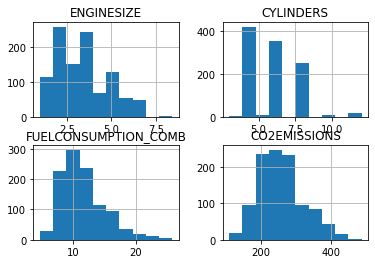

In [16]:
hgraph=coldf[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
hgraph.hist()

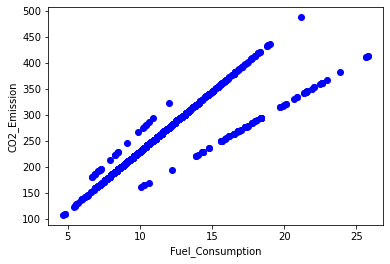

In [18]:
plt.scatter(coldf.FUELCONSUMPTION_COMB,coldf.CO2EMISSIONS,color='blue')
plt.xlabel("Fuel_Consumption")
plt.ylabel("CO2_Emission")
plt.show()

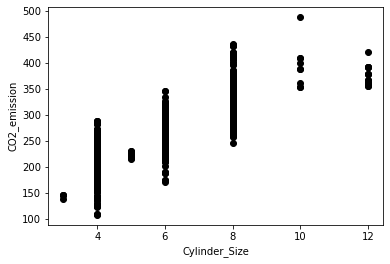

In [19]:
plt.scatter(coldf.CYLINDERS,coldf.CO2EMISSIONS,color="black")
plt.xlabel("Cylinder_Size")
plt.ylabel("CO2_emission")
plt.show()

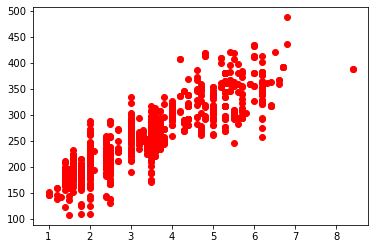

In [20]:
plt.scatter(coldf.ENGINESIZE,coldf.CO2EMISSIONS,color="red")
plt.show()

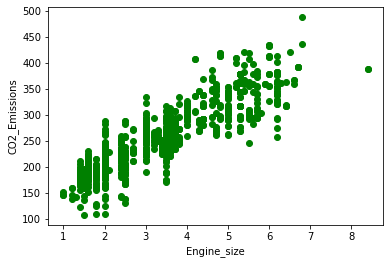

In [23]:
plt.scatter(coldf.ENGINESIZE,coldf.CO2EMISSIONS,color="green")
plt.xlabel("Engine_size")
plt.ylabel("CO2_Emissions")
plt.show()

In [25]:
mlt=np.random.rand(len(df))<0.8
train=coldf[mlt]
test=coldf[~mlt]

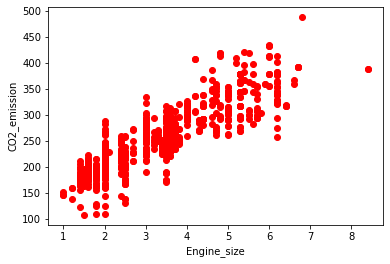

In [26]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='red')
plt.xlabel("Engine_size")
plt.ylabel("CO2_emission")
plt.show()

In [32]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(train_x,train_y)
print('coefficients:',reg.coef_)
print('Intercept:',reg.intercept_)

coefficients: [[38.81488357]]
Intercept: [126.34786678]


Text(0, 0.5, 'Emission')

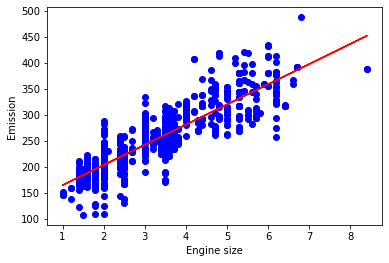

In [35]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_x,reg.coef_[0][0]*train_x+reg.intercept_[0],'-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')

In [40]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=reg.predict(test_x)
print("Mean Absolute error: %.2f"% np.mean(np.absolute(test_y_-test_y)))
print("Residual sum of squares(MSE): %.2f"%np.mean((test_y_-test_y)**2))
print("R2-score:%.2f"% r2_score(test_y,test_y_))

Mean Absolute error: 22.05
Residual sum of squares(MSE): 841.14
R2-score:0.80
